# Introduction :

*NOTE : This notebook have some codes from [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)*

## Our straegy :

1. Read the data and see what is missing
2. Analyzing the data by spreate this training dataset into two groups 
3. Try to clean our data and convert the categorical data to numeric data by filling the missing data and create new features using feature engineering 
4. Use several ML algorithms to predict the test data

## Our problem :

We have two dataset (training/testing) and we want to use the traning data to create the best ML model that can predict the correct labels for the testing data .

## Goals :

1. Analyzing the data 
2. Create new features to develop the model's preformance 
3. completing the missing data
4. create the best ML model by using the best algorthim


# Data analysis :

In the few code cells below we will discover the following :

1. In age there is about 120  missing values in training and about 100 missing values in testing
2. In Embarked there is 3 missing values
3. In Cabin there is more than 600 missing values in training and about 300 missing data in testing



> Don't think a lot about what we are going to do with these missing data especially in cabin .

we will also see which data is more effective than other data .



In [1]:
import numpy as np # Data processing
import pandas as pd # Data analysis
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline

In [2]:
df_train = pd.read_csv("../input/titanic/train.csv") # Open data files
df_test = pd.read_csv("../input/titanic/test.csv") 
connect = [ df_train , df_test ]
plt.style.use('fivethirtyeight') # Change the style of the plots

Print the first 10 lines

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.info()
print('---------------')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64

In [5]:
lived = df_train.query("Survived == 1")
dead = df_train.query("Survived == 0")

As we see first I sperate the training dataset into two groups one for who survived and the other one for who dead , that just to help as in data analysis .

<AxesSubplot:>

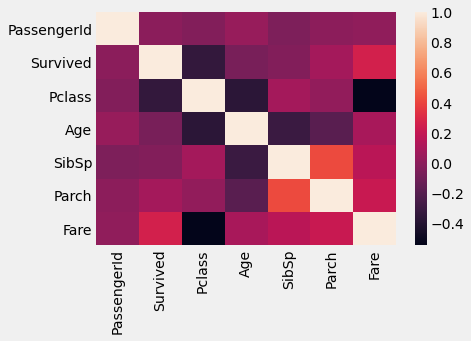

In [6]:
corr = df_train.corr()
sns.heatmap(corr)

Here we saw the correlation between the features , In my view I see that the effective data is :
1. Age
2. SibSp
3. Parch
4. Sex

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we saw in the describtion above the mean of age is 29 years and at least everyone have 1 SibSp and 1 Parch .

In [8]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


there we saw that most of our passengers was males and came from embarked S .

 > when we look to the following desribtion we discover most of the deaths were in males  we saw that in this dataset about 550 were dead , 468 of them were males .

> In the other hand when we look on who is survived we found that females who is the most survived there , 342 people in this dataset were survived , 233 of them were females

In [9]:
df_train.groupby('Survived')['Sex'].describe()

,count,unique,top,freq
Survived,,,,
0,549,2,male,468
1,342,2,female,233


In the following graph, we will see that people who were older than 50 years had less hope to rescue .

Aslo most of deaths were between 20 years and 25 years and it's start going down after 30 years .

babies between 1 year to 5 years have more hope to rescure also who is between 25 years and 35 years have hope to .

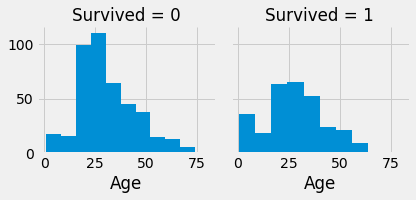

In [10]:
g = sns.FacetGrid(df_train,col='Survived')
g.map(plt.hist,'Age')

> the following graph shows as that is feamles have more hope than males to rescure , we will see the number of deaths in males is bigger than females , that makes as to discover in the titanic rescue operation, they were focused on females and babies but not the same focus with males, which makes the death numbers are higher in males

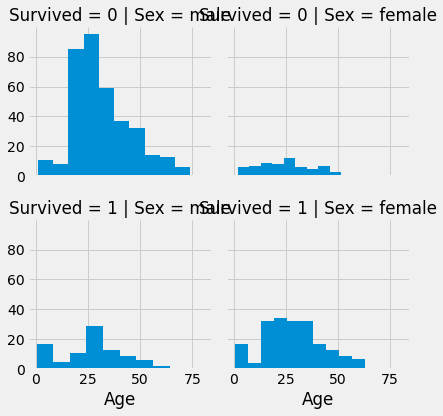

In [11]:
g = sns.FacetGrid(df_train,col='Sex',row='Survived')
g.map(plt.hist,'Age')

the following graph just to be sure about the info that we said in the beginnings which says " Most of our passengers came from embarked S " .

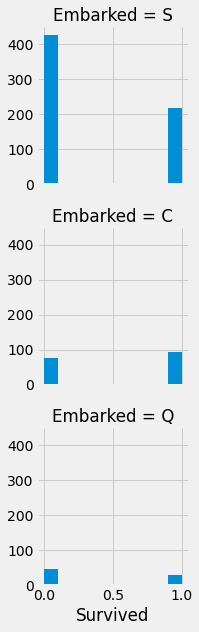

In [12]:
g = sns.FacetGrid(df_train,row = 'Embarked')
g.map(plt.hist ,'Survived')

Instead of looking at SibSp and Parch alone we are going we put them in the same feature under the name of FamilySize and that what we called features engineering.

 > I want you to think why I add 1 to?

 If you look at the graphs after the description below, you will find that families with more than 5 people have less hope than other families in rescue operations, because the large family were going to take more time than other families were which less than 5 people.


In [13]:
for dataset in connect:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

lived = df_train.query("Survived == 1")
dead = df_train.query("Survived == 0")

print(lived.groupby('FamilySize')['FamilySize'].describe())
print("-"*70)
print(dead.groupby('FamilySize')['FamilySize'].describe())

            count  mean  std  min  25%  50%  75%  max
FamilySize                                           
1           163.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2            89.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
3            59.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
4            21.0   4.0  0.0  4.0  4.0  4.0  4.0  4.0
5             3.0   5.0  0.0  5.0  5.0  5.0  5.0  5.0
6             3.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
7             4.0   7.0  0.0  7.0  7.0  7.0  7.0  7.0
----------------------------------------------------------------------
            count  mean  std   min   25%   50%   75%   max
FamilySize                                                
1           374.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
2            72.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
3            43.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0
4             8.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0
5            12.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
6            19.0   6.0  0.0  

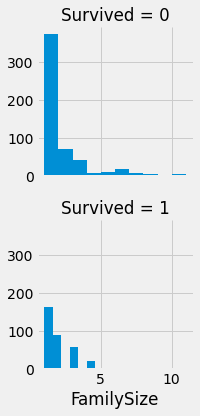

In [14]:
g = sns.FacetGrid(df_train,row='Survived')
g.map(plt.hist,'FamilySize')

Now we're going to create a new feature called **IsAlone** , it's return 1 if the **FamilySize** equal to 1 or 0 if the **FamilySize** equal to more than 1 .

I'm thinking now you understand why we added 1 before .

> In the few cells below we will find most of the people dead were alone 

In [15]:
df_train['IsAlone'] = 0 
df_train.loc[ df_train['FamilySize'] == 1 , 'IsAlone' ] = 1
df_test['IsAlone'] = 0 
df_test.loc[ df_test['FamilySize'] == 1 , 'IsAlone' ] = 1

lived = df_train.query("Survived == 1")
dead = df_train.query("Survived == 0")

In [16]:
print(lived.groupby('IsAlone')['Survived'].describe())
print('-'*50)
print(dead.groupby('IsAlone')['Survived'].describe())

         count  mean  std  min  25%  50%  75%  max
IsAlone                                           
0        179.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1        163.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
--------------------------------------------------
         count  mean  std  min  25%  50%  75%  max
IsAlone                                           
0        175.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        374.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


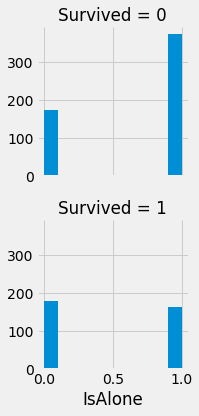

In [17]:
g = sns.FacetGrid(data=df_train,row='Survived')
g.map(plt.hist,'IsAlone')

# Data processing :

Now after we took a look at the data and saw which features were effective in this disaster , if we remember in the beginning we found some of missing data in our dataset (training / testing ) , now we want to process this data by filling the nulls or delete this nulls features if we can't fill it.

also we want to convert the categorical value to numeric values.

First we will fill the nulls in embarked by give the nulls the value of most repeated embarked .


In [18]:
MostRepeat = dataset['Embarked'].dropna().mode()[0]
print(MostRepeat)

S


In [19]:
for dataset in connect:
  dataset['Embarked'] = dataset['Embarked'].fillna(MostRepeat)

In the next two cells we will convert the embarked and sex from a categorical values to numeirc values .


In [20]:
for dataset in connect:
  dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [21]:
for dataset in connect:
  dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})

The next function for filling the nulls in age .
it's from [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [22]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
for dataset in connect:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [24]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

In [25]:
y_train = df_train['Survived'].values
x_train = df_train.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
x_test = df_test.drop(['Name','Ticket','Cabin'],axis=1)

# Model training :

Now after we analysis our data then make some processing at it , to make it ready for training .

we will use several algorithms .

In [26]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
IDs = x_test.pop('PassengerId')

In [28]:
RandomForestClassifier = RandomForestClassifier(random_state =33)
RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(random_state=33)

In [29]:
y_pred = RandomForestClassifier.predict(x_train)

In [30]:
print("RandomForestClassifier score: " , np.round(RandomForestClassifier.score(x_train,y_train)*100))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

RandomForestClassifier score:  98.0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

[[545   4]
 [ 14 328]]


In [31]:
Logistic_Regression = LogisticRegression(penalty='l1',solver='liblinear',random_state=33)

In [32]:
Logistic_Regression.fit(x_train,y_train)

LogisticRegression(penalty='l1', random_state=33, solver='liblinear')

In [33]:
y_pred = Logistic_Regression.predict(x_train)

In [34]:
print("LogisticRegression score: " , np.round(Logistic_Regression.score(x_train,y_train)*100))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

LogisticRegression score:  81.0
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891

[[478  71]
 [102 240]]


In [35]:
SGDC = SGDClassifier(random_state=33)
SGDC.fit(x_train,y_train)

SGDClassifier(random_state=33)

In [36]:
y_pred = SGDC.predict(x_train)

In [37]:
print("SGDClassifier score: " , np.round(Logistic_Regression.score(x_train,y_train)*100))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

SGDClassifier score:  81.0
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       549
           1       0.62      0.64      0.63       342

    accuracy                           0.71       891
   macro avg       0.70      0.70      0.70       891
weighted avg       0.71      0.71      0.71       891

[[416 133]
 [123 219]]


In [38]:
DecisionTree = DecisionTreeClassifier(random_state=33)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=33)

In [39]:
y_pred = DecisionTree.predict(x_train)

In [40]:
print("DecisionTreeClassifier score: " , np.round(Logistic_Regression.score(x_train,y_train)*100))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

DecisionTreeClassifier score:  81.0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

[[546   3]
 [ 15 327]]


Now after we use some of ML algorithms we found the scores :
 
 1. RandomForestClassifier score:  98.0
 2. LogisticRegression score:  81.0
 3. SGDClassifier score:  81.0
 4. DecisionTreeClassifier score:  81.0

 As we see the best one was RandomForestCalssifier , so we are going to use it to predict **x_test** .

In [41]:
y_pred = RandomForestClassifier.predict(x_test)

In [42]:
solution = pd.DataFrame({'PassengerId':IDs,'Survived':y_pred})
solution = solution.to_csv('./Submission.csv',index=False)

In the end of this notebook , please if you saw any mistakes in my code leave a comment and tell me what is wrong and why .

Or if you take some new knowlage also leave a comment and tell us what you learnt from this notebook.

Thanks for your time at reading this notebook, 

all love ,

Goodbye .